### Grouping customers by their annual income and spending score

In [1]:
#Importing neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../../../Data Science/DataSets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Extract the relevant features Annual Income (k$) and Spending Score (1-100) from the dataset.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

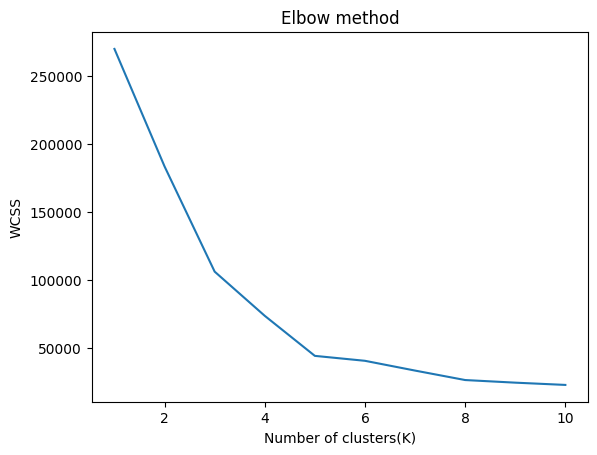

In [11]:
#Finding the optimal value of k
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(np.arange(1, 11), wcss)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title("Elbow method")
plt.show()

In [7]:
#From observation, the most optimal k is 5
model = KMeans(n_clusters=5, random_state=42)
y_kmeans = model.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

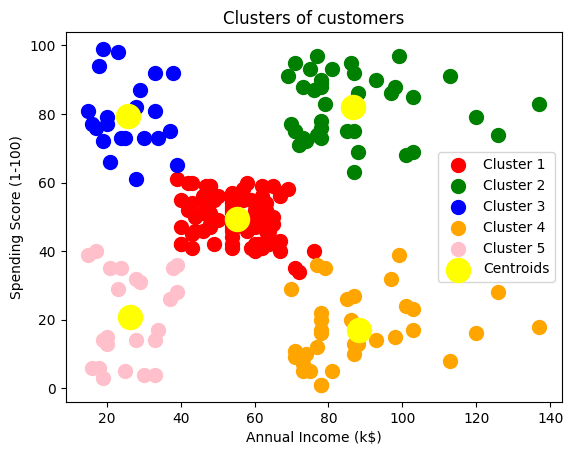

In [10]:
#Representing each cluster on scatered plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label='Cluster 1', s=100, c='red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label='Cluster 2', s=100, c='green')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label='Cluster 3', s=100, c='blue')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], label='Cluster 4', s=100, c='orange')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], label='Cluster 5', s=100, c='pink')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()